### Importing libraries

In [47]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


### Read Data from Data Set and pre-processing

In [48]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [49]:
print(df.shape)
print("\n")
df.dtypes # check data types

(200, 5)




CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [50]:
df.isnull().sum() # check for missing/null values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### EDA

***Creating Histogram to examine the distribution of values for each feature.***

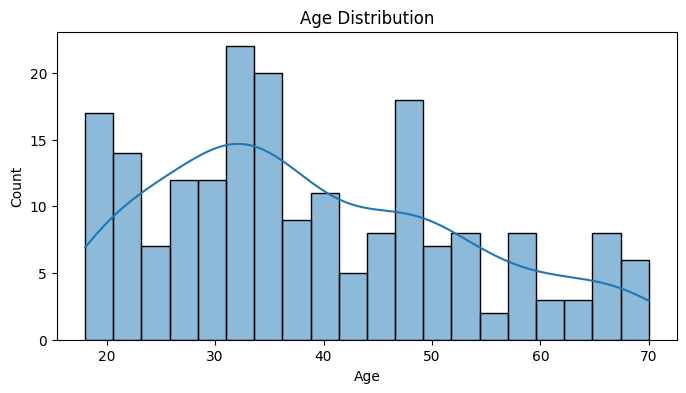

In [53]:
#Age
plt.figure( figsize=(8, 4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

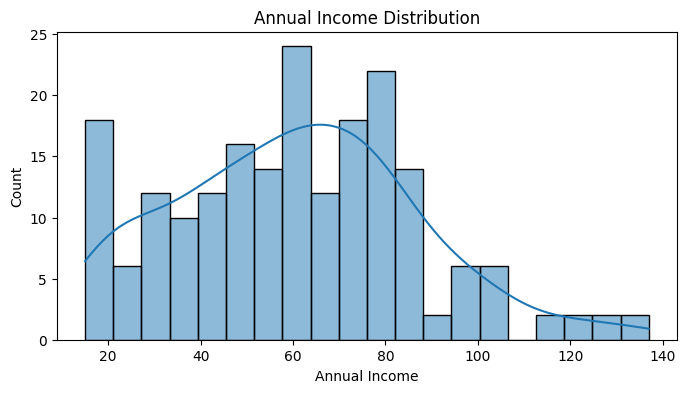

In [54]:
#Annual Income
plt.figure( figsize=(8, 4))
sns.histplot(df["Annual Income (k$)"], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()

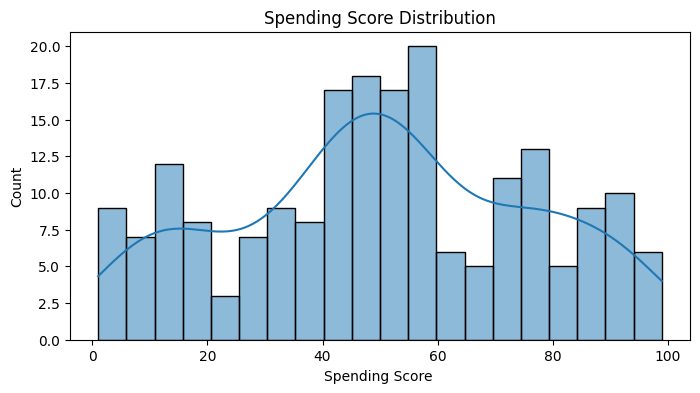

In [55]:
#Spening Score
plt.figure( figsize=(8, 4))
sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score ")
plt.ylabel("Count")
plt.show()

***Creating Boxplot to analyze outliers***

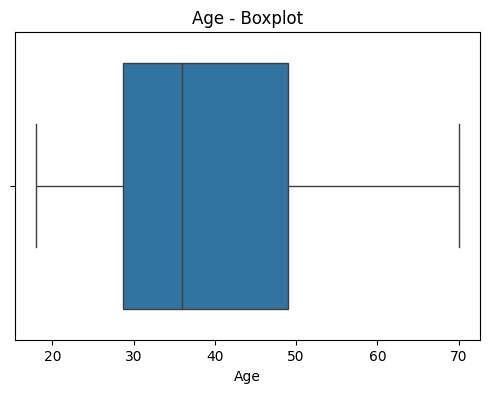

In [56]:
#Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Age"])
plt.title("Age - Boxplot")
plt.show()

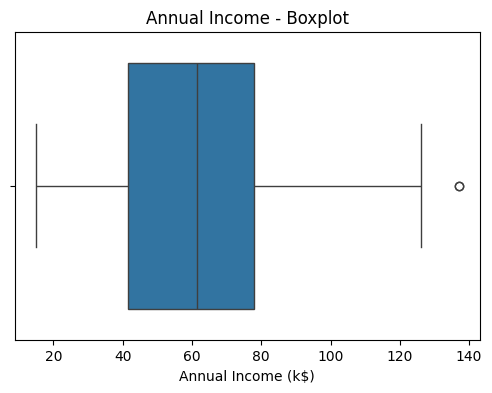

In [57]:
#Annual Income
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Annual Income (k$)"])
plt.title("Annual Income - Boxplot")
plt.show()

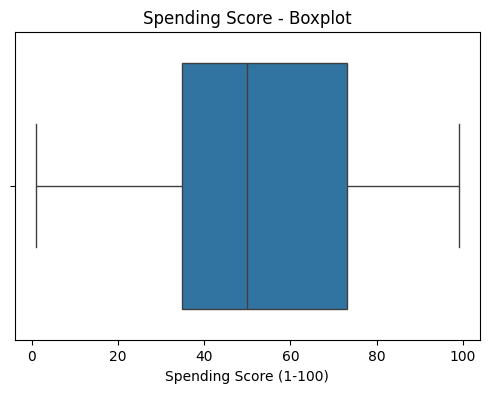

In [58]:
#Spending Score
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Spending Score (1-100)"])
plt.title("Spending Score - Boxplot")
plt.show()

***scatter plot to see whether the clusters are visually distinguishable.***

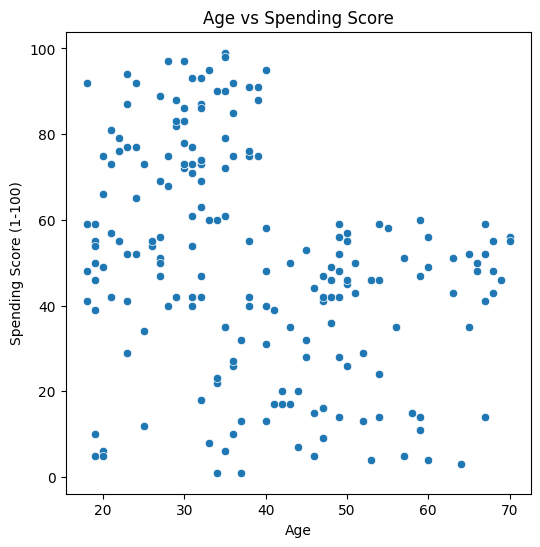

In [59]:
#Age vs Spending Score
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)")
plt.title("Age vs Spending Score")
plt.show()

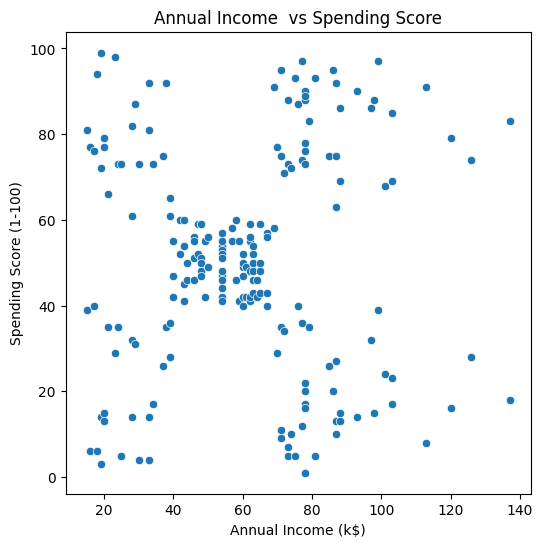

In [60]:
#Annual Income vs Spending Score
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")
plt.title("Annual Income  vs Spending Score")
plt.show()

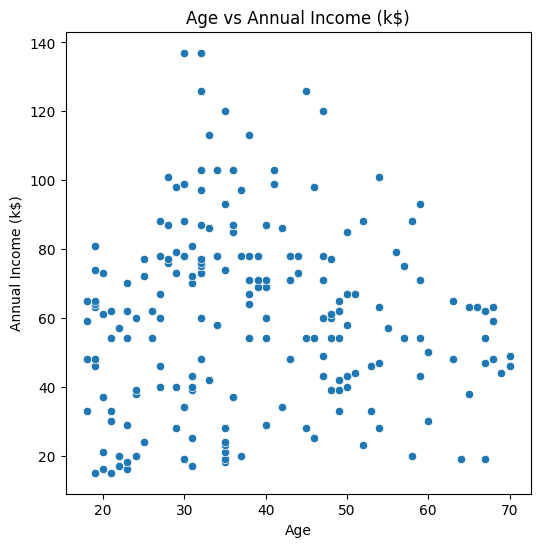

In [61]:
#Age vs Annual Income
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x="Age", y="Annual Income (k$)")
plt.title("Age vs Annual Income (k$)")
plt.show()

***Countplot diagram for Gender***

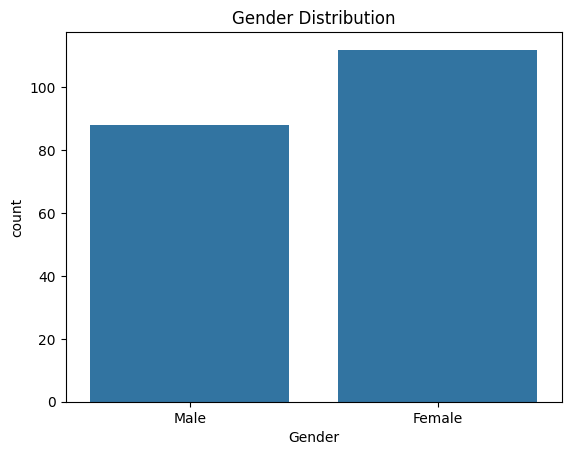

In [62]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()

***Relation Between numeric cols***

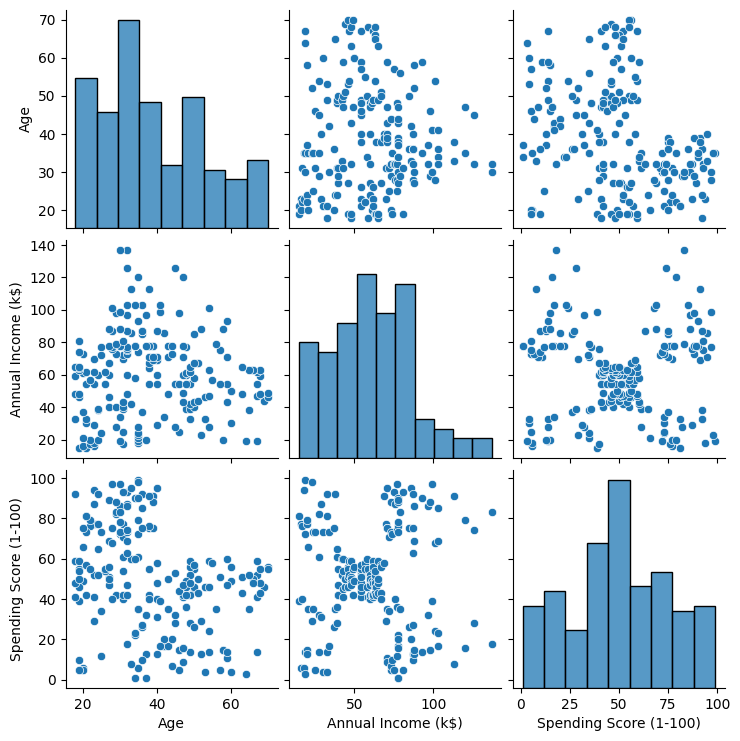

In [63]:
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.show()

### Data Preprocessing(Feature Set)

define feature set X:

In [64]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

***To use Scikit-learn we should convert pandas data frame to a Numpy array***

In [65]:
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

***Scaling(Normalization)***

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Clustering Algorithms

***Elbow Method To find the optimal number of clusters K for the KMeans algorithm.***

In [67]:
from sklearn.cluster import KMeans

In [68]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

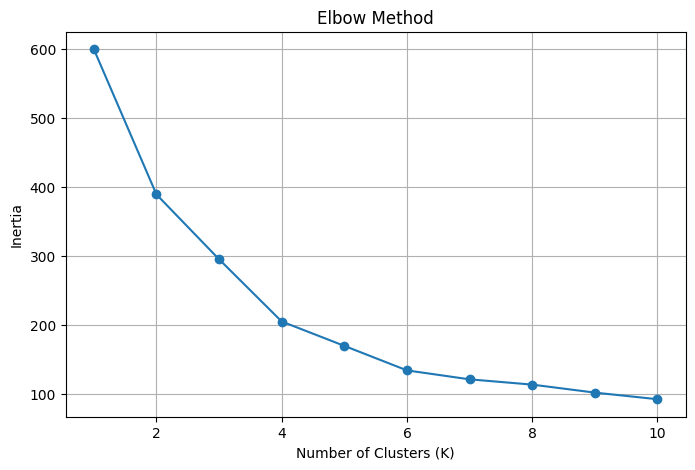

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

As shown in the chart, the inertia drops sharply up to K = 5, and then the curve starts to flatten.
This indicates that adding more clusters beyond K = 5 results in minimal improvement.

***Fit KMeans***

In [70]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

***Add Cluster Labels to the Original DataFrame***

In [71]:
#analyze the results
df["Cluster"] = clusters

In [72]:
#view the result 
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
5,6,Female,22,17,76,2
6,7,Female,35,18,6,3
7,8,Female,23,18,94,2
8,9,Male,64,19,3,0
9,10,Female,30,19,72,2


### Cluster Analysis & Visualization

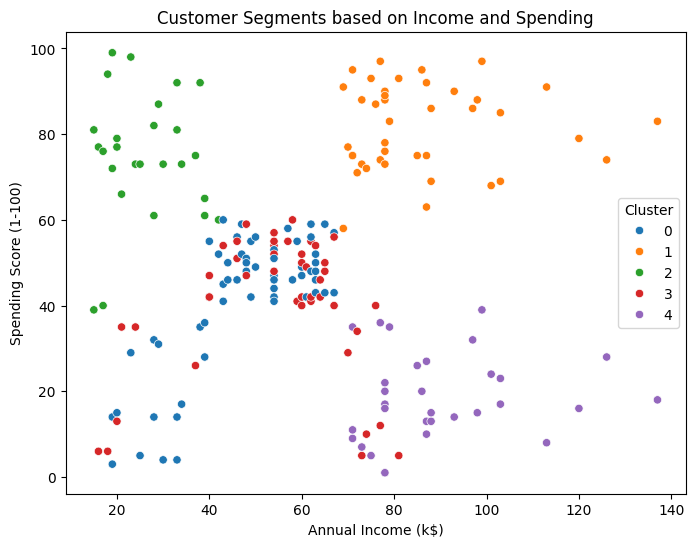

In [73]:
#Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    data=df
)
plt.title("Customer Segments based on Income and Spending")
plt.show()

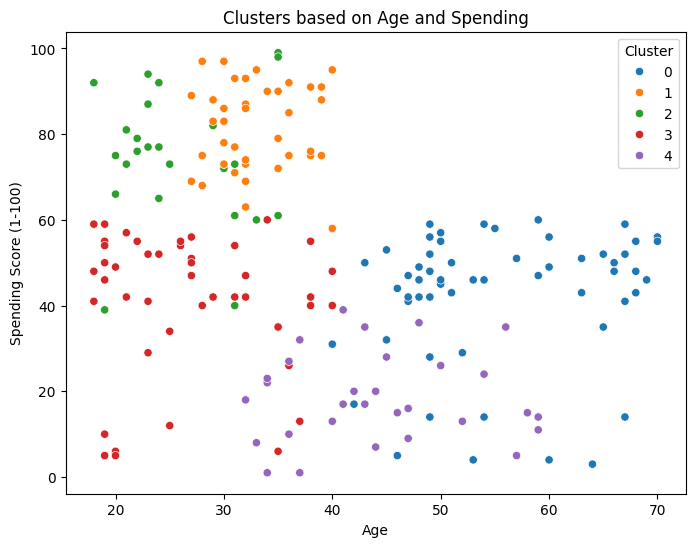

In [74]:
#Age vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Age",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    data=df
)
plt.title("Clusters based on Age and Spending")
plt.show()

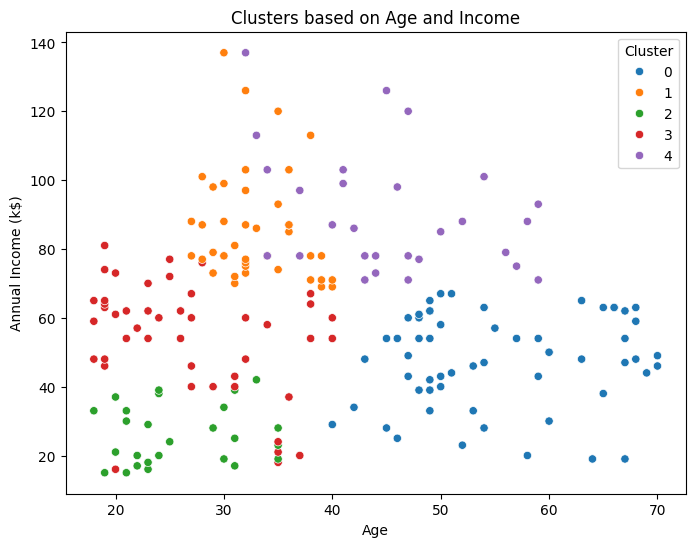

In [75]:
#Age vs Income
#Age vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Age",
    y="Annual Income (k$)",
    hue="Cluster",
    palette="tab10",
    data=df
)
plt.title("Clusters based on Age and Income")
plt.show()

***Cluster Profiling***

In [76]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


### Interpretation
- Cluster 1 – Luxury Spenders: Young to mid-aged customers with high income and very high spending habits.
- Cluster 2 – Young Budget Breakers: Younger customers with low income but surprisingly high spending, possibly risk-takers or impulsive buyers.
- Cluster 0 – Cautious Seniors: Older customers with moderate income and conservative spending.
- Cluster 4 – Wealthy Minimalists: High-income individuals who spend very little — possibly investors or frugal by choice.
- Cluster 3 – Balanced Millennials: Young professionals with moderate income and spending patterns.